In [2]:
#import open3d
#import torch
#import cv2
import glob
import trimesh
import argparse
import torch
import numpy as np
from pymesh import load_mesh, save_mesh, form_mesh

In [3]:
!ls dataset/modelnet40_off_aligned

#!conda install -c conda-forge trimesh -n ys
#!wget http://modelnet.cs.princeton.edu/ModelNet40.zip
#!wget --no-check-certificate https://lmb.informatik.uni-freiburg.de/resources/datasets/ORION/modelnet40_manually_aligned.tar

airplane   bowl     desk	keyboard     person	 sofa	 tv_stand
bathtub    car	    door	lamp	     piano	 stairs  vase
bed	   chair    dresser	laptop	     plant	 stool	 wardrobe
bench	   cone     flower_pot	mantel	     radio	 table	 xbox
bookshelf  cup	    glass_box	monitor      range_hood  tent
bottle	   curtain  guitar	night_stand  sink	 toilet


In [28]:
d = glob.glob('dataset/modelnet40_off_aligned/*')
import os
print(os.path.split(d[0]))


('dataset/modelnet40_off_aligned', 'dresser')


In [4]:
category = 'car'
offs = glob.glob('dataset/modelnet40_off_aligned/%s/train/*.off'%category)
annots = [x +'.annot' for x in offs]
#15:car_0040.off
#
index = 14
cur_off = offs[index]
cur_annot = annots[index]
print(cur_off)
f = open(annots[index],'r')
f.readlines()


dataset/modelnet40_off_aligned/car/train/car_0007.off


['90.000000\n', '0.000000\n']

In [5]:
def generate_random_pc(point_cloud_num,method='simple'):
    #limit_scale = [-1,1]
    if method=='simple':
        return torch.randn(point_cloud_num, 3)*2-torch.ones(point_cloud_num, 3)
    elif method=='poisson':
        limit_dis = 0.00001
        #pd = PoissonDisk3D(point_cloud_num,limit_dis,limit_size=[-1,1])
        pass
     

In [6]:
mesh = trimesh.load(cur_off,process=False)
verts = mesh.vertices
print(len(verts),len(verts[0]))

xs = verts[:,0].ravel()
ys = verts[:,1].ravel()
zs = verts[:,2].ravel()

xs_range = [np.min(xs),np.max(xs)]
ys_range = [np.min(ys),np.max(ys)]
zs_range = [np.min(zs),np.max(zs)]
xs_avg = np.sum(xs)/len(verts)
ys_avg = np.sum(ys)/len(verts)
zs_avg = np.sum(zs)/len(verts)
print(xs_avg,ys_avg,zs_avg)
print(xs_range,ys_range,zs_range)
#verts = generate_random_pc(len(verts)*2)
#print(mesh.is_watertight)
for facet in mesh.facets:
    mesh.visual.face_colors[facet] = trimesh.visual.random_color()
mesh.show()

19475 3
-26964.873088575096 70729.51401797176 706.5320414890887
[TrackedArray(-29434.2), TrackedArray(-24901.1)] [TrackedArray(69707.5), TrackedArray(71743.6)] [TrackedArray(202.916), TrackedArray(1366.44)]


/home/mmvc/.conda/envs/ys/lib/python3.6/site-packages/trimesh/visual/color.py:640: RuntimeWarning: divide by zero encountered in true_divide
  vertex_colors /= mesh.faces_sparse.sum(axis=1)
/home/mmvc/.conda/envs/ys/lib/python3.6/site-packages/trimesh/visual/color.py:640: RuntimeWarning: invalid value encountered in true_divide
  vertex_colors /= mesh.faces_sparse.sum(axis=1)
/home/mmvc/.conda/envs/ys/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [14]:
#mesho = 
#mesh.bounding_box_oriented.show()
verts = mesh.apply_transform(mesh.bounding_box_oriented.primitive.transform).vertices
print(verts,len(verts))
xs = verts[:,0].ravel()
ys = verts[:,1].ravel()
zs = verts[:,2].ravel()

xs_range = [np.min(xs),np.max(xs)]
ys_range = [np.min(ys),np.max(ys)]
zs_range = [np.min(zs),np.max(zs)]

xs_avg = np.sum(xs)/len(verts)
ys_avg = np.sum(ys)/len(verts)
zs_avg = np.sum(zs)/len(verts)

print(xs_avg,ys_avg,zs_avg)
print(xs_range,ys_range,zs_range)

[[-5.80474090e+02 -7.67906952e+03  1.10480174e+05]
 [-4.80230377e+02 -7.70130026e+03  1.10540006e+05]
 [-5.36572156e+02 -7.71393183e+03  1.10511689e+05]
 ...
 [-6.83144384e+01 -6.79773648e+03  1.12318639e+05]
 [-9.01633224e+01 -6.79511282e+03  1.12061777e+05]
 [-8.89522193e+01 -6.79528628e+03  1.12066990e+05]] 19475
-453.26701874180327 -7514.827353185024 112449.83525196007
[TrackedArray(-1156.72934533), TrackedArray(292.46522644)] [TrackedArray(-8570.00216033), TrackedArray(-6486.44591261)] [TrackedArray(110387.60716788), TrackedArray(114920.97659244)]


In [29]:
def generate_random_pc(point_cloud_num,method='simple'):
    #limit_scale = [-1,1]
    if method=='simple':
        return  #np.ones(point_cloud_num, 3)
        #return torch.randn(point_cloud_num, 3)*2-torch.ones(point_cloud_num, 3)
    elif method=='poisson':
        limit_dis = 0.00001
        #pd = PoissonDisk3D(point_cloud_num,limit_dis,limit_size=[-1,1])
        pass
     

In [11]:
in_mesh = load_mesh(cur_off);
print(in_mesh.num_vertices, in_mesh.num_faces, in_mesh.num_voxels)
in_mesh.add_attribute("vertex_normal");
v_normals = in_mesh.get_vertex_attribute("vertex_normal");

print(len(in_mesh.vertices))
print(len(v_normals))

'''
new_num_vert = 3*in_mesh.num_vertices
#radius_gen_points = 1.0/150
new_pc_v = np.random.rand(new_num_vert, 3)*2-1
print(len(new_pc_v))

out_mesh = form_mesh(new_pc_v, np.zeros((0, 3), dtype=int));

out_mesh.add_attribute("nx");
out_mesh.add_attribute("ny");
out_mesh.add_attribute("nz");

out_mesh.set_attribute("nx", new_pc_v[:,0].ravel());
out_mesh.set_attribute("ny", new_pc_v[:,1].ravel());
out_mesh.set_attribute("nz", new_pc_v[:,2].ravel());

avg_x = np.sum(new_pc_v[:,0].ravel())/out_mesh.num_vertices
avg_y = np.sum(new_pc_v[:,1].ravel())/out_mesh.num_vertices
avg_z = np.sum(new_pc_v[:,2].ravel())/out_mesh.num_vertices

print(avg_x,avg_y,avg_z)

print(out_mesh.num_vertices, out_mesh.num_faces, out_mesh.num_voxels)
out_name = offs[index][:-4]+'.ply'
print(out_name)

save_mesh(out_name, out_mesh, "nx", "ny", "nz");
'''

19475 13164 0
19475
19475


'\nnew_num_vert = 3*in_mesh.num_vertices\n#radius_gen_points = 1.0/150\nnew_pc_v = np.random.rand(new_num_vert, 3)*2-1\nprint(len(new_pc_v))\n\nout_mesh = form_mesh(new_pc_v, np.zeros((0, 3), dtype=int));\n\nout_mesh.add_attribute("nx");\nout_mesh.add_attribute("ny");\nout_mesh.add_attribute("nz");\n\nout_mesh.set_attribute("nx", new_pc_v[:,0].ravel());\nout_mesh.set_attribute("ny", new_pc_v[:,1].ravel());\nout_mesh.set_attribute("nz", new_pc_v[:,2].ravel());\n\navg_x = np.sum(new_pc_v[:,0].ravel())/out_mesh.num_vertices\navg_y = np.sum(new_pc_v[:,1].ravel())/out_mesh.num_vertices\navg_z = np.sum(new_pc_v[:,2].ravel())/out_mesh.num_vertices\n\nprint(avg_x,avg_y,avg_z)\n\nprint(out_mesh.num_vertices, out_mesh.num_faces, out_mesh.num_voxels)\nout_name = offs[index][:-4]+\'.ply\'\nprint(out_name)\n\nsave_mesh(out_name, out_mesh, "nx", "ny", "nz");\n'

# mesh = pymesh.load_mesh(out_name)
print(mesh.num_vertices, mesh.num_faces, mesh.num_voxels)


In [12]:
!ls dataset/modelnet40_off_aligned/car/train/ | grep ply

car_0007.ply
car_0082.ply
car_0108.ply


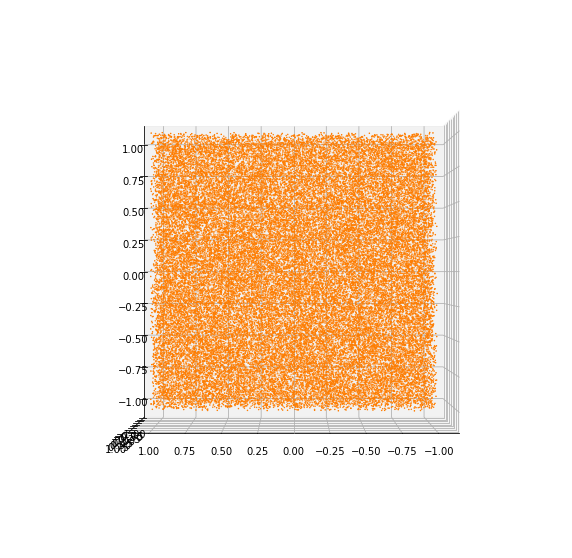

In [14]:
from pyntcloud import PyntCloud
car1 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0007.ply")
car1.plot()
#car2 = PyntCloud.from_file("dataset/modelnet40_off_aligned/car/train/car_0108.ply")
#car2.plot()

In [29]:
!nvidia-smi

Tue Oct  8 01:51:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 418.56       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:19:00.0 Off |                  N/A |
| 41%   56C    P0    41W / 180W |      0MiB /  8119MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 64%   88C    P2   159W / 250W |  10983MiB / 10989MiB |     77%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import os
a = 'ad/a/d/s/jius/q/d/asd'
a.split('/')

['ad', 'a', 'd', 's', 'jius', 'q', 'd', 'asd']